![](https://i.imgur.com/xRp1fVS.png)

<h1> <b>Group Members</b> </h1>

<ul>
  <li>Daniel David Delgado Cervantes - 2182066 <b>Grupo H2</b></li>
  <li>Gianfranco Estevez Ruiz - 2183074 <b>Grupo H1</b> </li>
  <li>Edward Javier Parada Silva - 2182070 <b>Grupo H2</b></li>

</ul>


# **Table of Contents**







1. [**Datasets, pre-processing and more Shenanigans**](#eje1)

    1.   [Product Review Dataset](#eje11)
    2.   [Extracting Numeric Values From Text](#eje12)

        1. [Sentimental Lexicon Dataset](#eje121)
        2. [Words, Characters and Repetitions](#eje121)

    3. [Preprocessing The Dataset](#eje13)
    4. [Extraction Process](#eje14)

2. [**Training The Classifiers**](#eje2)

    1. [Desicion Tree Classffiers](#eje21)
    2. [Support-Vector Clasffiers](#eje22)
    3. [Cross Validation](#eje23)
    4. [KMeans](#eje24)

3. [**Conclusions**](#eje3)

# **1. Datasets, Preprocessing and more Shenanigans**  <a name="eje1"></a>


## **Product Review Dataset** <a name="eje11"></a>
The dataset we decided to use in order to create our review classifier, contains 4 columns. The first of this columns, `category`, defines what type of product was reviewed. From the dataset, 10 categories were identified:

- Clothing Shoes and Jewelry
- Electronics
- Home and Chicken
- Kindle Store
- Movies and TV
- Pet Supplies
- Sports and Outdoors
- Tools and Home Improvement
- Toys and Games
- Books

The next column is `rating`. It is related to the rating given in the review. This value ranges from 1 to 5 and it describes the perceived quality of the product according to the reviewer. It's expected that most of the fake reviews are either 5 out 5 stars, to boost the product's popularity; or negative, 1 out 5 stars, if the objective was to demerit other products.

The last two columns were `label` which is our ground truth. It can be either "CG", "computer-generated"; or "OR", which stands for "original review". And `text` which contains the actual review left by the customer or bot.

In [ ]:
#@markdown <h3><i>Product Review Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the dataset

data = pd.read_csv('https://raw.githubusercontent.com/Gacrucis/WhoReviewsTheReviews/main/fake_revievs_dataset.csv')
data.head(10)

,category,rating,label,text
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
5,Home_and_Kitchen_5,3.0,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.
6,Home_and_Kitchen_5,5.0,CG,They are the perfect touch for me and the only...
7,Home_and_Kitchen_5,3.0,CG,These done fit well and look great. I love th...
8,Home_and_Kitchen_5,5.0,CG,"Great big numbers & easy to read, the only thi..."
9,Home_and_Kitchen_5,5.0,CG,My son loves this comforter and it is very wel...



## **Extracting Numeric Values From Text** <a name='eje12'></a>

Since, in this case, we are working not with numbers but with text, we need to find a way to extract numeric values we can work with in order to train the different. This can be done in several ways which will be presented in this section.




### Sentimental Lexicon Dataset <a name='eje121'></a>

In order to extract the most out of the text for each of the reviews, we decided to extract the sentimentality value. In this context, sentimentality refers to the positive and negative feelings associated with words. 

For example, a positive review would contain words like: love, great, perfect. A lot of these words of this sort would imply a positive relationship with the product. In the other hand, words like: bad, sad, hate; would appear more in bad reviews.

In order to identify what words had positive or negative connotations, we used a dataset from The University of Chicago that contained both kinds of words. We assigned a value of 1 to positive words and a value of -1 to negative words. Using this, we calculated the sentimentality value for each review on our dataset.


In [ ]:
#@markdown <h3><i>Sentimental Lexicon Dataset

data_lexicon = pd.read_csv('https://raw.githubusercontent.com/Gacrucis/WhoReviewsTheReviews/main/lexicon.csv')
data_lexicon

,word,value
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
6784,zaps,-1
6785,zealot,-1
6786,zealous,-1
6787,zealously,-1


### Words, Characters and Repetitions <a name='eje122'></a>

Next, it was established that we need to extract some of the basic components of how the text was written in terms of length, total words and characters of the review; and the repetition value, which is the total amount of words divided by the number of unique words in the review.  With these three values, we were expecting to increase the available information to our classifiers and be able to correctly classify each of the product reviews.

In the end, we expected each row of out dataset to look like this:

|  | category | rating | label | text | sentiment_positive | sentiment_negative | sentiment_value | word_amount | char_amount | repetition_value |
|---|---|---|---|---|---|---|---|---|---|---|
| 0 | Home_and_Kitchen_5 | 5.0 | CG | Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty | 6 | 0 | 6 | 13 | 75 | 1.181818

## **Preprocessing The Dataset** <a name='eje13'></a>

In order to work with each of the product reviews, a preprocessing step was needed in order to normalize the text in so all numerical values planned to be extracted could be without any complications. The following is an example of how this was done.

In [ ]:
# We create a list containing most of the used punctuation symbols used on English
punctuations = [',', '.', '?', '¿', '!', '@', '$', '(', ')', ':', ';', '/', '%', '#', '"', "'"]

# We take the text of one of the reviews in the dataset
example_text = data.values[0, 3]
text_ws = example_text
print('Text with symbols:')
print(example_text)

# Then, for each symbol on out punctuations list, we replace each of them with a space
for punc in punctuations:
    text_ws = text_ws.replace(punc, ' ')

# This gives us the text without any punctuation symbols
print('\nText without symbols:')
print(text_ws)

# We split the text review into words using each space as our guide
print('\nSeparate each word:')
words = text_ws.split(' ')
print(words)

# And finally, we remove all the '' instances from the separated word list and lowercase them
print('\nClean the end result:')
words = [word.lower() for word in words if word != '']
print(words)

Text with symbols:
Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty

Text without symbols:
Love this   Well made  sturdy  and very comfortable   I love it Very pretty

Separate each word:
['Love', 'this', '', '', 'Well', 'made', '', 'sturdy', '', 'and', 'very', 'comfortable', '', '', 'I', 'love', 'it', 'Very', 'pretty']

Clean the end result:
['love', 'this', 'well', 'made', 'sturdy', 'and', 'very', 'comfortable', 'i', 'love', 'it', 'very', 'pretty']


With this now clear, we can begin extracting all of the numerical values from our dataset.

## **Extraction Process** <a name='eje14'></a>


With our preprocessing steps ready and the numerical values we want to extract defined, we can now do the actual extraction of the data planned to be used to train each of the classifiers available. The following block of code has the objective of both preprocessing and calculating each of the columns defined in the [Extracting Numeric Values From Text](#eje12) section.

In [ ]:
# We take all the values on the `text` column from the dataset
texts = data['text']

# And parse the lexicon dataset into a python dict due to optimization patterns
lexicon_dict = {word: value for word, value in data_lexicon.values}

# We then create all the lists that will contain all the numerical values we extract from the dataset
sentimentalities = []
sentimentalitiesPositive = []
sentimentalitiesNegative = []
char_amounts = []
word_amounts = []
repetitions = []

# Now, the extraction process can begin
for text in texts:
    # Some basic constants are defined
    sentimentality = 0
    positive = 0
    negative = 0

    # this block represents the preprocessing section of the text
    for punc in punctuations:
        text = text.replace(punc, ' ')
    text = text.strip()
    words = text.split(' ')
    words = [word.lower() for word in words if word != '']

    # We begin by extracting the sentimental values of our dataset
    for word in words:
        # If the word has a positive connotation
        if lexicon_dict.get(word, 0) > 0:
            sentimentality += 1
            positive += 1
        # else if the connotation is negative
        elif lexicon_dict.get(word, 0) < 0:
            sentimentality -= 1
            negative -= 1
        # else if the word is not present in the lexicon dict, no value is added
        

    # We extract the char count from the text
    char_amount = len(text)

    # The total words of the preprocessed text
    word_amount = len(words)

    # Finally, we calculate the repetition value
    repetition = word_amount/max((len(np.unique(words)), 1))

    # All of the values calculated are added to the lists
    sentimentalities.append(sentimentality)
    sentimentalitiesPositive.append(positive)
    sentimentalitiesNegative.append(negative)
    char_amounts.append(char_amount)
    word_amounts.append(word_amount)
    repetitions.append(repetition)

# In the end we add all the new colums to the original dataset
data['sentiment_positive'] = sentimentalitiesPositive #type: ignore
data['sentiment_negative'] = sentimentalitiesNegative #type: ignore
data['sentiment_value'] = sentimentalities #type: ignore
data['word_amount'] = word_amounts #type: ignore
data['char_amount'] = char_amounts #type: ignore
data['repetition_value'] = repetitions #type: ignore

data

,category,rating,label,text,sentiment_positive,sentiment_negative,sentiment_value,word_amount,char_amount,repetition_value
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",6,0,6,13,75,1.181818
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",2,0,2,17,80,1.062500
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,1,0,1,14,66,1.166667
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",1,0,1,17,81,1.062500
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,2,0,2,18,85,1.125000
...,...,...,...,...,...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...,13,-6,7,338,1693,1.931429
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...,26,-1,25,280,1303,2.545455
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ...",8,-4,4,352,1986,1.652582
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...,30,0,30,302,1299,2.770642


# **2. Training The Classifiers** <a name='eje2'></a>


Now that we have all the numerical values we extracted from the text, we can use the calculated values to train some of the avalible classifiers. After everythin is ready, we'll be able to gauge the effectiveness of each of the extracted values from the text while trying to determine the reason behind the weight behind each of the columns used to classify each of the product reviews.

Before we can begin, one last step is required in order to start training each of the classifiers. We need to replace the labels with a numerical value and define the features that will be used in training. 

In [ ]:
from sklearn.model_selection import train_test_split

# Simple replace operation on our label column
data.replace(to_replace='CG', value=0)
data.replace(to_replace='OR', value=1)

# We take all of the numerical columns from our dataset.
features = ['rating', 'word_amount', 'char_amount', 'sentiment_value', 'sentiment_positive', 'sentiment_negative', 'repetition_value']

# And we split the dataset in it's features and it's groundtruth
X = data[features]
y = data['label']

Now, with this last step done, we can begin our training and testing process.

## **Desicion Tree Classifiers** <a name='eje21'></a>


One of the most used classfiers due their nature are Desicion Tree Classfiers, this is due to the general speed they have in the creation of their model. In this case, we decided to vary the depth of the trees in order to gauge how good they were. For this test, we decided to test with depth values 5, 10, 15 and 20 with a `test_size` of 20%.

The follwing block of code shows this training and testing process:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Using train_test_split, we split the dataset with a test_size of 20%
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

desTrees = []

for depth in [5, 10, 15, 20]:
    # We create our estimator
    estTree = DecisionTreeClassifier(max_depth=depth)

    # Fitting time
    estTree.fit(x_train, y_train)

    # We save the generated model
    desTrees.append(estTree)

    # The the model score
    score = estTree.score(x_test, y_test)
    print(f'Score with depth {depth}: {score}.')

Score with depth 5: 0.7218993446271794.
Score with depth 10: 0.809818226783727.
Score with depth 15: 0.7939903548905651.
Score with depth 20: 0.7695066155558303.


As an aditional measure we were looking to find what features are the most important during the classification process. In order to determine this, we'll be using the `feature_importances_` to determine what were the most relevant features in average.

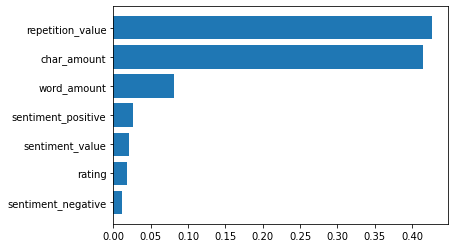

In [ ]:
mean_features = []
for index, _feature in enumerate(features):
    feat = 0
    for tree in desTrees:
        feat += tree.feature_importances_[index]
    
    mean_features.append(feat/len(desTrees))

features = np.array(features)
mean_features = np.array(mean_features)

plt.barh(features[np.argsort(mean_features)], mean_features[np.argsort(mean_features)]); 
plt.xlabel("Feature Importance")

In average, we can see than the most important features are `repetition_value` and `char_amount`. Although we can't be certain of why the model chose those values over things like `sentimentality` or `word_amount`, we could make a guess that the reason it saw `repetition_value` and `char_amount` as their main differentiator. In this case, we could see this two features as relatively connected as a higher `repetition_value` could be expected in shorter reviews which, by the looks of it, seems to be the case with most computer generated reviews. 

## **Support Vector Classifiers** <a name='eje22'></a>

Similar to [Decision Tree Classifiers](#eje21), Support Vector Machines are really considered good when classification problems are set. In this case, we decided to use `SVC` as a mean to classify the different kinds of machines due to them being considered more robust in general. In this case, we'll be variating the `C` parameter on out `SVC` estimators.


In [ ]:
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

for c in [1, 5, 10, 15]:
    # Create the estimator
    est = SVC(C=c)

    # Fit the estimator
    est.fit(x_train, y_train)

    # Get the score
    score = est.score(x_test, y_test)

    print(f'Puntaje con test {c} : {score}.')

Puntaje con test 1 : 0.683566217385928.
Puntaje con test 5 : 0.7060714727340176.
Puntaje con test 10 : 0.7101520959564733.
Puntaje con test 15 : 0.7141090639297638.


The first thing to be noticed is how the scores of the `SVC` are lower to the ones achived by the [Decision Tree Classifiers](#eje21). This, to be honest, was quite unexpected as the main reason to use a `SVC` falls into them being more robust in classification terms. In order to gauge why the SVCs weren't as efective as their Tree conterpats, we looked at what the `SVC` found to be the most important features during the classification process.


Text(0.5, 0, 'Permutation Importance')

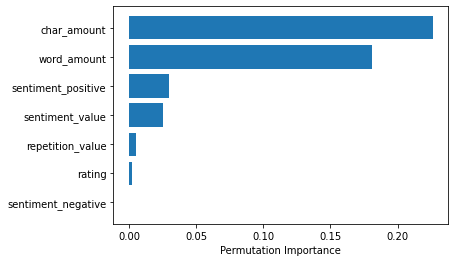

In [ ]:
perm_importance = permutation_importance(est, x_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx]);
plt.xlabel("Permutation Importance")

As it can be seen, the `SVC` decided to use different features as the main differentiators. In this case, `char_amount` and `word_amount` where the main features used. 

Once again, we can't really know why the `SVC` decided to use those features as to have higher importance but we could guess that it falls into computer generated reviews usually being shorter than actual human reviews. 

## **Cross Validation** <a name='eje23'></a>

Finally we decided to apply cross validation in order to check on each of the estimators that gave the best scores from both [Decision Tree Classifiers](#eje21) and [Support Vector Classifiers](#eje22). 

First, let's do cross validaton with the Decision Tree Classifier with a depth of 10.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer

X = data[features]
y = data['label']

treeEst = DecisionTreeClassifier(max_depth=10)

s = cross_val_score(treeEst, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print (s)
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

[0.80934718 0.81132542 0.81647292 0.81721494 0.81647292 0.82290378
 0.808558   0.80534257 0.80089043 0.81152609]
accuracy 0.812 (+/- 0.00611)


As it can be seen, the `treeEst` has a average accuracy of 81.2% which gives us a really good score. From this, we could be relatively certain of if a product review is real or not. 

Next, we'll repeat the process with the best `SVC` estimator. In this case, that would be a Support Vector Classifier with `C = 15`.

In [ ]:
X = data[features]
y = data['label']

svcEst = SVC(C=15)

s = cross_val_score(svcEst, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print (s)
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

[0.70944609 0.72527201 0.69997527 0.70986891 0.71803116 0.71976255
 0.71531041 0.71778382 0.7296562  0.7116003 ]
accuracy 0.716 (+/- 0.00806)


As expected, the average score for the `SVC` is 71.6%. While this is still a good score, when compared to the Decision Tree Classifier, in both terms of speed and average score, it's hard to justify the use of a `SVC` for this specific application.

## **KMeans** <a name='eje24'></a>




As a last way of visualizing the data, we decided the use `KMeans` as a way of visualizing the clusters of how the reviews were being told apart from each other. In order to be more thorough with the data, and how it's being treated, we used `PCA` to generate components from all the features. We also decided to use the best Desicion Tree Classifier features for the `KMeans` data in order to try to visualize how clusters of that sort would look like.

In [ ]:
from sklearn.decomposition import PCA

# Create the PCA components from all the feautures
pca = PCA(2)
kmeans_df = pca.fit_transform(data[features])

# And extract the best features from the treeEst
best_feat_df = X[['repetition_value', 'char_amount']]


With this data, we could now fit out `KMeans` with both the `PCA` components and the best features.

In [ ]:
from sklearn.cluster import KMeans

# PCA kmeans
pca_kmeans = KMeans(n_clusters= 2)
pca_kmeans_labels = pca_kmeans.fit_predict(kmeans_df, y)

# Best feats kmeans
best_feat_kmeans = KMeans(n_clusters=2)
best_feat_kmeans_labels = best_feat_kmeans.fit_predict(best_feat_df, y)

With each of our `KMeans` trained, we can now graph the clusters.

First, let's check the `PCA` clusters. 

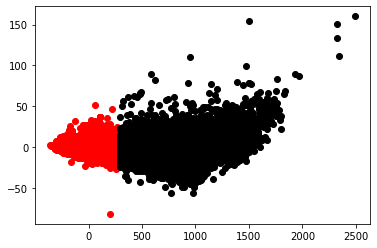

In [ ]:
computer_pca = kmeans_df[pca_kmeans_labels == 0] # CG
original_pca = kmeans_df[pca_kmeans_labels == 1] # OR



plt.scatter(computer_pca[:,0] , computer_pca[:,1] , color = 'red')
plt.scatter(original_pca[:,0] , original_pca[:,1] , color = 'black')
plt.show()

As we can see, there is a very strict like defined by the `KMeans` where it diferenciates the original reviews from rht computer generated ones. We can't really tell what each of the components generated by the PCA represent but it's apparent than the result is a broader interval for our original reviews when compared to the computer reviews.

Finally, let's see how the clusters for our best features look like.

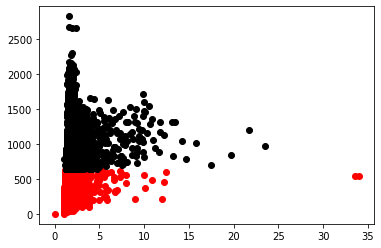

In [ ]:
computer_best = best_feat_df[best_feat_kmeans_labels == 0] # CG
original_best = best_feat_df[best_feat_kmeans_labels == 1] # OR


plt.scatter(computer_best.iloc[:,0] , computer_best.iloc[:,1] , color = 'red')
plt.scatter(original_best.iloc[:,0] , original_best.iloc[:,1] , color = 'black')
plt.show()

We can tell than the x-axis represents the `repetition_value` and the `char_amount` is our y-axis due to the scale factor alone. From the way the `KMeans` has defined the clusters, we can tell that one of the strongest factors falls into the total amount of characters the review amounts to. It seems computer generated reviews tend to be shorter in general when compared to real reviews. 

# **3. Conclusions** <a name='eje3'>

After the development of this notebook, the first thing we are able to conclue falls into the fullfilment of our main objective of building an AI capable of classifying product reviews into them being real or computer generated. 

From the 2 estimators selected, Decision Trees and Support Vector Machines, we are able to conclude than, when compared, they are both able to achieve the main objective, in this particular application, Decision Trees were deemed supperior due to both better score and faster train and predict speeds. The latter begin the heaviest factor due the speed being high really important when classifying hundreds of reviews. 

